In [1]:
import pandas as pd
from datetime import datetime
from plotnine import *

1.   Qual a ‘evolução’ da população carcerária do Brasil?

In [2]:
df_infogeral = pd.read_csv('dados/df_infogeral.csv', na_values = ["NI", "-"]) # RR, RO e RJ com menos observ
#df_infogeral['mes_num'] = '12'
#df_infogeral['mes_num'][df_infogeral['mes'] == "jun"] = '06'


def transf_data(x):
  obj = x['mes_num'] + '-' + str(x['ano'])
  date = datetime.strptime(obj, '%m-%Y')
  return date

#df_infogeral['ano_mes_data'] = df_infogeral.apply(transf_data, axis = 1)
df_infogeral

,level,value,uf,mes,ano,var
0,População carcerária,4244.000000,ac,dez,2014,pop
1,População carcerária por 100.000 habitantes,535.130889,ac,dez,2014,pop
2,População carcerária,3488.000000,ac,jun,2014,pop
3,População carcerária por 100.000 habitantes,441.462547,ac,jun,2014,pop
4,População carcerária,4649.000000,ac,dez,2015,pop
...,...,...,...,...,...,...
691,População carcerária por 100.000 habitantes,291.951126,to,jun,2019,pop
692,População carcerária,4126.000000,to,dez,2020,pop
693,População carcerária por 100.000 habitantes,259.456387,to,dez,2020,pop
694,População carcerária,4308.000000,to,jun,2020,pop


In [3]:
pop_carc_abs = df_infogeral[df_infogeral['level'] == 'População carcerária']
pop_carc_abs = pop_carc_abs.query('mes == "dez"')
pop_carc_sum = pop_carc_abs.groupby(['ano'], as_index = False).agg(total = ('value', 'sum'))

In [4]:
pop_carc_sum

,ano,total
0,2014,621805.0
1,2015,698186.0
2,2016,721609.0
3,2017,722169.0
4,2018,740540.0
5,2019,754601.0
6,2020,811113.0


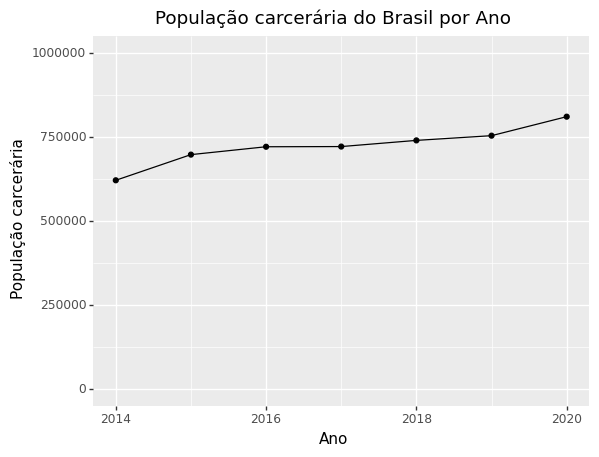

<ggplot: (8778730875381)>

In [5]:
# Graf linhas
(
ggplot(data = pop_carc_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "População carcerária do Brasil por Ano", 
       x = "Ano", 
       y = "População carcerária")
+ ylim([0, 1000000])
#+ theme(axis_text_x = element_text(rotation = 90))
)

2. Quais os estados com maiores populações carcerárias segundo o dado mais recente?

In [7]:
# 2020
pop_carc_abs_dez2020 = pop_carc_abs.query(' ano == 2020 & mes == "dez"').sort_values(by = 'value', ascending = False)
#pop_carc_abs_dez2020.to_csv('tab/pop_carc_abs_dez2020.csv', index = False)
pop_carc_abs_dez2020[['uf', 'value']]

,uf,value
666,sp,213795.0
464,pr,72826.0
282,mg,65892.0
488,rj,61777.0
588,rs,41148.0
412,pe,35727.0
152,ce,35675.0
230,go,31623.0
178,df,27595.0
614,sc,24860.0


3. Quais os estados com maiores populações carcerárias proporcionalmente à sua população segundo o dado mais recente?

In [8]:
pop_carc_prop_dez2020 = df_infogeral.query(' ano == 2020 & mes == "dez" & level != "População carcerária"').sort_values(by = 'value', ascending = False)
#pop_carc_prop_dez2020.to_csv('tab/pop_carc_prop_dez2020.csv', index = False)
pop_carc_prop_dez2020[['uf', 'value']]

,uf,value
179,df,903.229270
23,ac,902.657440
309,ms,722.006240
539,ro,698.540463
563,rr,655.913280
465,pr,632.343594
205,es,596.645909
335,mt,481.308597
667,sp,461.866668
231,go,444.546597


4. Qual estado teve maior crescimento da sua população carcerária?

In [ ]:
# TO DO

5. Qual a evolução do número de consultas de psicologia?

In [9]:
df_cons = pd.read_csv('dados/df_cons.csv', na_values = ["NI", "-"]) 
df_cons = df_cons[['level', 'total', 'uf', 'mes', 'ano']]
df_cons = df_cons.rename({'total':'value'}, axis = 'columns')
df_cons

,level,value,uf,mes,ano
0,Consultas psicológicas,1036.0,ac,dez,2014
1,Consultas psicológicas,212.0,ac,jun,2014
2,Consultas psicológicas,921.0,ac,dez,2015
3,Consultas psicológicas,229.0,ac,dez,2016
4,Consultas psicológicas,323.0,ac,jun,2016
...,...,...,...,...,...
345,Consultas psicológicas,935.0,to,jun,2018
346,Consultas psicológicas,1170.0,to,dez,2019
347,Consultas psicológicas,898.0,to,jun,2019
348,Consultas psicológicas,822.0,to,dez,2020


In [10]:
df_cons_ano = df_cons.groupby(['ano', 'uf'], as_index = False).agg(total = ('value', 'sum'))
df_cons_ano.sort_values('total', ascending = False)

,ano,uf,total
79,2016,sp,153057.0
106,2017,sp,144615.0
52,2015,sp,131110.0
160,2019,sp,129666.0
133,2018,sp,121957.0
...,...,...,...
75,2016,rr,79.0
48,2015,rr,11.0
45,2015,rj,0.0
90,2017,ma,0.0


In [11]:
df_cons_ano_min_max = df_cons_ano.groupby(['uf'], as_index = False).agg({'total':['min', 'max']})
df_cons_ano_min_max
#df_cons_ano_min_max.sort_values('max', ascending = False)

uf    total          
            min       max
0   ac    552.0    3761.0
1   al   7665.0   10704.0
2   am   9639.0   32560.0
3   ap     79.0    1374.0
4   ba  24885.0   46381.0
5   ce   5795.0   42326.0
6   df   4498.0    7239.0
7   es  12559.0   41219.0
8   go   1555.0   10661.0
9   ma      0.0   52481.0
10  mg  56853.0   94825.0
11  ms   9795.0   16360.0
12  mt   3648.0   14256.0
13  pa  16165.0   25272.0
14  pb   6337.0   11627.0
15  pe  26456.0   41245.0
16  pi   1044.0    3587.0
17  pr   6783.0   13776.0
18  rj      0.0   21631.0
19  rn    227.0    5893.0
20  ro    340.0    3082.0
21  rr     11.0    1520.0
22  rs  27794.0   76344.0
23  sc  17807.0   27095.0
24  se   1622.0   11630.0
25  sp  79714.0  153057.0
26  to   1483.0    2718.0

In [12]:
# Todas as consultas por ano
cons_sum = df_cons_ano.groupby(['ano'], as_index = False).agg(total = ('total', 'sum'))
cons_sum

,ano,total
0,2014,439024.0
1,2015,429925.0
2,2016,537119.0
3,2017,537994.0
4,2018,477353.0
5,2019,620019.0
6,2020,586165.0


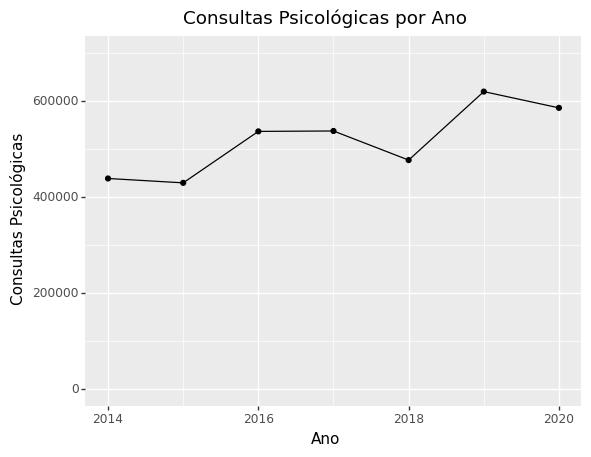

<ggplot: (8778729858521)>

In [13]:
(
ggplot(data = cons_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Consultas Psicológicas por Ano", 
       x = "Ano", 
       y = "Consultas Psicológicas")
+ ylim([0, 700000])
#+ theme(axis_text_x = element_text(rotation = 90))
)

6. Qual a evolução do número de suicídios?

In [14]:
df_suic = pd.read_csv('dados/df_suic.csv', na_values = ["NI", "-"]) 
df_suic = df_suic[['level', 'total', 'uf', 'mes', 'ano']]
df_suic = df_suic.rename({'total':'value'}, axis = 'columns')
df_suic = df_suic[df_suic['level'].str.contains('suicídios', na = False)]

In [71]:
df_suic = df_suic.dropna(subset = ["value"])
df_suic_ano =  df_suic.groupby(['uf', 'ano'], as_index = False).agg(total = ('value', 'sum'))
df_suic_ano.sort_values('total', ascending = False)

,uf,ano,total
95,pa,2018,55.0
76,mg,2020,44.0
177,sp,2016,35.0
96,pa,2019,35.0
176,sp,2015,31.0
...,...,...,...
24,ap,2017,0.0
25,ap,2018,0.0
26,ap,2019,0.0
27,ap,2020,0.0


In [73]:
# Create a dataset
df_suic_ano_unmelted = df_suic_ano.pivot(columns = 'uf', index = 'ano')

df_suic_ano_unmelted

total                                ...                                      
uf      ac   al   am   ap   ba   ce   df  ...   ro   rr    rs    sc   se    sp   to
ano                                       ...                                      
2014   2.0  1.0  2.0  0.0  7.0  4.0  0.0  ...  1.0  0.0  10.0  12.0  0.0  23.0  4.0
2015   0.0  1.0  4.0  0.0  7.0  2.0  1.0  ...  5.0  0.0   6.0  14.0  2.0  31.0  3.0
2016   1.0  1.0  0.0  0.0  5.0  1.0  3.0  ...  2.0  0.0   6.0   2.0  2.0  35.0  5.0
2017   0.0  1.0  2.0  0.0  5.0  0.0  1.0  ...  5.0  1.0   8.0  12.0  0.0  29.0  0.0
2018   1.0  2.0  1.0  0.0  6.0  1.0  0.0  ...  1.0  0.0   4.0   3.0  0.0  29.0  0.0
2019   1.0  0.0  4.0  0.0  5.0  8.0  1.0  ...  6.0  0.0  12.0  12.0  1.0  25.0  1.0
2020   0.0  3.0  1.0  0.0  9.0  6.0  4.0  ...  5.0  1.0  13.0  12.0  1.0  28.0  2.0

[7 rows x 27 columns]

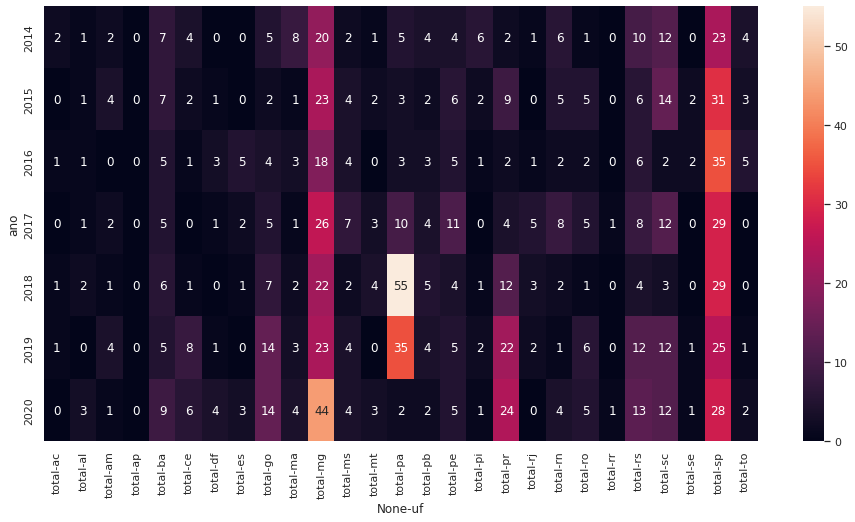

In [84]:
import seaborn as sns
import numpy as np
# Default heatmap
sns.set(rc = {'figure.figsize':(16,8)})
df_suic_ano_heatmap = sns.heatmap(df_suic_ano_unmelted, annot = True)

df_suic_ano_heatmap

In [ ]:
df_suic_ano_min_max = df_suic_ano.groupby(['uf'], as_index = False).agg({'total':['min', 'max']})
#list(df_suic_ano_min_max.columns)
df_suic_ano_min_max.sort_values(('total', 'max'), ascending = False)

In [78]:
df_suic_uf =  df_suic.groupby(['uf'], as_index = False).agg(total = ('value', 'sum'))
df_suic_uf.sort_values('total', ascending = False)

,uf,total
25,sp,200.0
10,mg,176.0
13,pa,113.0
17,pr,75.0
23,sc,67.0
22,rs,59.0
8,go,51.0
4,ba,44.0
15,pe,40.0
19,rn,28.0


In [17]:
suic_sum = df_suic_ano.groupby(['ano'], as_index = False).agg(total = ('total', 'sum'))
suic_sum

,ano,total
0,2014,130.0
1,2015,135.0
2,2016,114.0
3,2017,150.0
4,2018,168.0
5,2019,191.0
6,2020,195.0


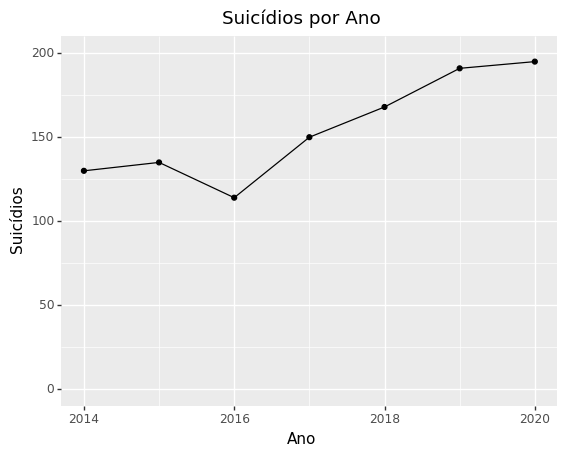

<ggplot: (8778729863581)>

In [18]:
(
ggplot(data = suic_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Suicídios por Ano", 
       x = "Ano", 
       y = "Suicídios")
+ ylim([0,200])
#+ theme(axis_text_x = element_text(rotation = 90))
)

7. Qual a evolução do número de profissionais de psicologia? E de médicos psiquiátricos?

In [21]:
df_psi = pd.read_csv('dados/df_psico.csv', na_values = ["NI", "-"]) 

# Separando em Psicólogos
df_psico = df_psi[df_psi['level'].str.contains('Terapeutas|Psicólogos|Psicólogos/as', na = False)]
df_psico = df_psico[['level', 'total', 'uf', 'mes', 'ano']]
df_psico = df_psico.rename({'total':'value'}, axis = 'columns')

# E Psiquiatras
df_psiqu = df_psi[df_psi['level'].str.contains('Psiquiatras|psiquiatras', na = False)]
df_psiqu = df_psiqu[['level', 'total', 'uf', 'mes', 'ano']]
df_psiqu = df_psiqu.rename({'total':'value'}, axis = 'columns')

In [23]:
df_psico = df_psico.dropna(subset = ["value"])
df_psico_ano =  df_psico.groupby(['uf', 'ano'], as_index = False).agg(total = ('value', 'max'))
df_psico_ano

,uf,ano,total
0,ac,2014,10.0
1,ac,2015,8.0
2,ac,2016,8.0
3,ac,2017,9.0
4,ac,2018,10.0
...,...,...,...
184,to,2016,9.0
185,to,2017,8.0
186,to,2018,8.0
187,to,2019,7.0


In [24]:
df_psiqu = df_psiqu.dropna(subset = ["value"])
df_psiqu_ano =  df_psiqu.groupby(['uf', 'ano'], as_index = False).agg(total = ('value', 'max'))
df_psiqu_ano

,uf,ano,total
0,ac,2014,2.0
1,ac,2015,3.0
2,ac,2016,6.0
3,ac,2017,4.0
4,ac,2018,6.0
...,...,...,...
184,to,2016,0.0
185,to,2017,1.0
186,to,2018,2.0
187,to,2019,2.0


In [36]:
psico_sum = df_psico_ano.groupby(['ano'], as_index = False).agg(total = ('total', 'sum'))
psico_sum

,ano,total
0,2014,1290.0
1,2015,1267.0
2,2016,1427.0
3,2017,1285.0
4,2018,1300.0
5,2019,1292.0
6,2020,1262.0


In [37]:
psiqu_sum = df_psiqu_ano.groupby(['ano'], as_index = False).agg(total = ('total', 'sum'))
psiqu_sum

,ano,total
0,2014,287.0
1,2015,197.0
2,2016,250.0
3,2017,269.0
4,2018,267.0
5,2019,243.0
6,2020,286.0


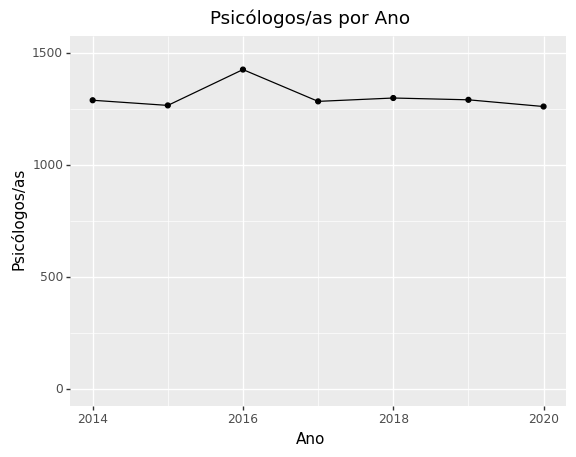

<ggplot: (8778729669349)>

In [30]:
(
ggplot(data = psico_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Psicólogos/as por Ano", 
       x = "Ano", 
       y = "Psicólogos/as")
+ ylim([0, 1500])
#+ theme(axis_text_x = element_text(rotation = 90))
)

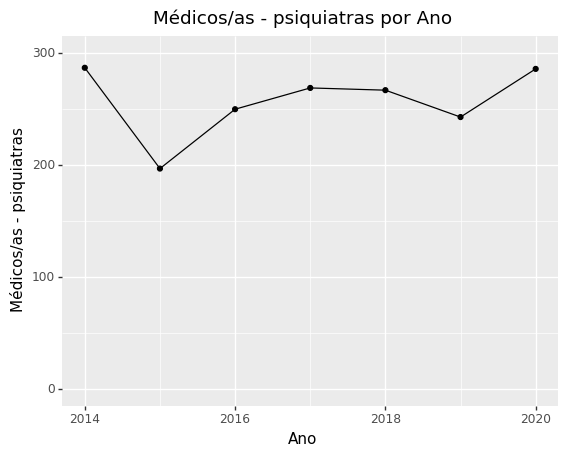

<ggplot: (8778729694393)>

In [32]:
(
ggplot(data = psiqu_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Médicos/as - psiquiatras por Ano", 
       x = "Ano", 
       y = "Médicos/as - psiquiatras")
+ ylim([0, 300])
#+ theme(axis_text_x = element_text(rotation = 90))
)

In [34]:
df_psico_ano_aux = df_psico_ano
df_psico_ano_aux = df_psico_ano_aux.rename({'total':'psico'}, axis = 'columns')
df_psico_ano_aux

,uf,ano,psico
0,ac,2014,10.0
1,ac,2015,8.0
2,ac,2016,8.0
3,ac,2017,9.0
4,ac,2018,10.0
...,...,...,...
184,to,2016,9.0
185,to,2017,8.0
186,to,2018,8.0
187,to,2019,7.0


In [35]:
df_psiqu_ano_aux = df_psiqu_ano
df_psiqu_ano_aux = df_psiqu_ano_aux.rename({'total':'psiqu'}, axis = 'columns')
df_psiqu_ano_aux

,uf,ano,psiqu
0,ac,2014,2.0
1,ac,2015,3.0
2,ac,2016,6.0
3,ac,2017,4.0
4,ac,2018,6.0
...,...,...,...
184,to,2016,0.0
185,to,2017,1.0
186,to,2018,2.0
187,to,2019,2.0


Dados Depressão

In [42]:
# Lendo os dados
sus = pd.read_excel('dados' + '/' + 'atend_sus.xlsx',
                          skiprows = 7)
sus = sus[['ANO', 'UF', 'total geral']]

# Pegar dados a partir de 2015 pq só há um registro de 2014
# Excluir dados de 2021
sus = sus[sus['ANO'] >= 2015]
sus = sus[sus['ANO'] < 2021]

sus = sus.groupby(['ANO', "UF"], as_index = False).agg(total = ('total geral', 'sum'))

sus.sort_values(by = 'total', ascending = False)

,ANO,UF,total
94,2020,RS,401
86,2020,MS,296
66,2019,MS,218
63,2019,GO,188
74,2019,RS,177
...,...,...,...
69,2019,PB,0
70,2019,PI,0
21,2017,BA,0
22,2017,CE,0


In [43]:
sus_sum = sus.groupby(['ANO'], as_index = False).agg(total = ('total', 'sum'))
sus_sum

,ANO,total
0,2015,51
1,2016,118
2,2017,293
3,2018,552
4,2019,1001
5,2020,1417


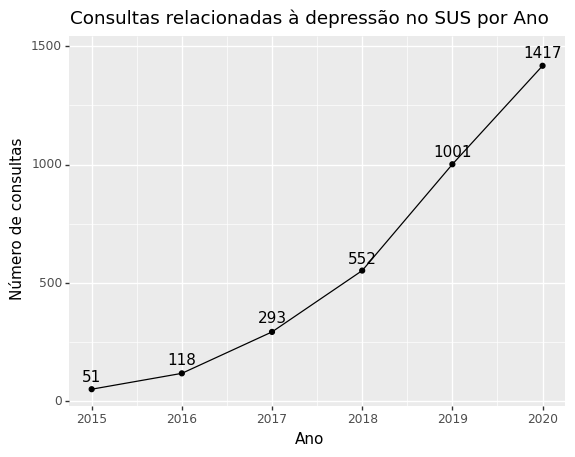

<ggplot: (8778729686197)>

In [44]:
(
ggplot(data = sus_sum,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Consultas relacionadas à depressão no SUS por Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ annotate('text', x = 2015, y = 100, label = '51')
+ annotate('text', x = 2016, y = 175, label = '118')
+ annotate('text', x = 2017, y = 350, label = '293')
+ annotate('text', x = 2018, y = 600, label = '552')
+ annotate('text', x = 2019, y = 1050, label = '1001')
+ annotate('text', x = 2020, y = 1470, label = '1417')
#+ ylim([0,200])
#+ theme(axis_text_x = element_text(rotation = 90))
)

In [ ]:
# Gráf barras fica melhor pq explicita os anos sem dados
(
ggplot(data = sus,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_bar(stat = 'identity', fill = '#ffc425') 
+ facet_wrap('~ UF', scales = 'free_y')
+ labs(title = "Consultas relacionadas à depressão no SUS por UF e Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ theme(figure_size = (20, 15))
)

In [45]:
sus_8uf = sus.query(" UF in ('DF', 'GO', 'MA', 'MG', 'MS', 'RS', 'SP', 'SC') ")
sus_8uf.query(" UF == 'DF' ")

,ANO,UF,total
23,2017,DF,7
42,2018,DF,58
61,2019,DF,106
81,2020,DF,95


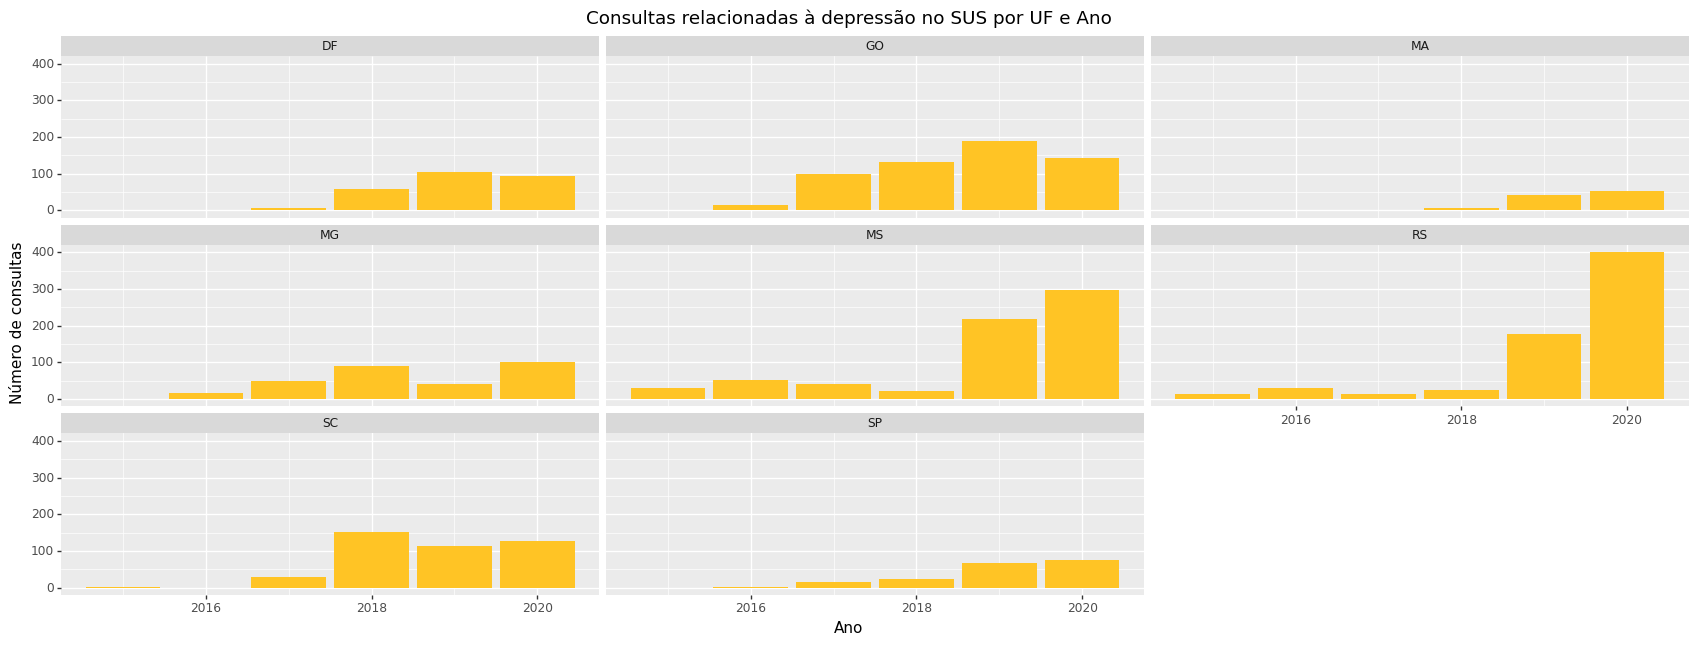

<ggplot: (8778729533317)>

In [46]:
# Com barra
(
ggplot(data = sus_8uf,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_bar(stat = 'identity', fill = '#ffc425') 
+ facet_wrap('~ UF')
+ labs(title = "Consultas relacionadas à depressão no SUS por UF e Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ theme(figure_size = (21, 7))
)

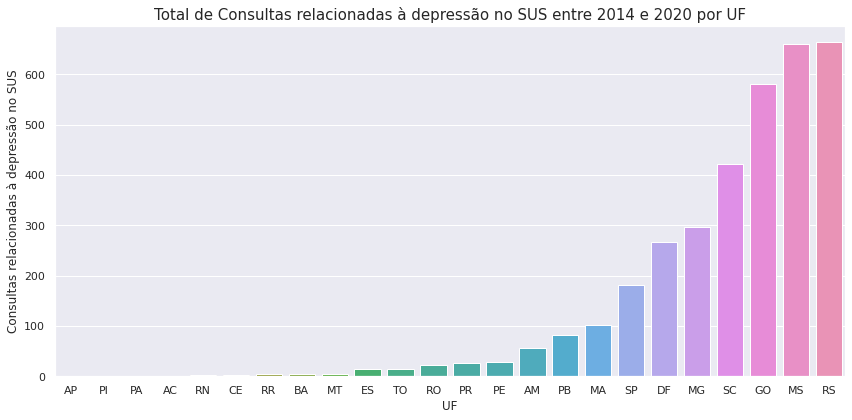

In [91]:
sus_uf = sus.groupby("UF", as_index = False).agg(total = ('total', 'sum'))
sus_uf = sus_uf.sort_values(by = 'total', ascending = False)

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
# make barplot and sort bars
sns.barplot(x = 'UF',
            y = 'total', 
            data = sus_uf, 
            order = sus_uf.sort_values('total').UF)
# set labels
plt.xlabel("UF", size = 12)
plt.ylabel("Consultas relacionadas à depressão no SUS", size = 12)
plt.title("Total de Consultas relacionadas à depressão no SUS entre 2014 e 2020 por UF", size = 15)
plt.tight_layout()
#plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)

In [92]:
sus_uf

,UF,total
20,RS,663
10,MS,660
7,GO,580
21,SC,421
9,MG,297
5,DF,266
22,SP,182
8,MA,102
13,PB,82
1,AM,56


JOIN: `pop_carc_abs` e `SUS`

In [93]:
# Obj SUS auxiliar
sus_aux = sus
sus_aux = sus_aux.rename({'ANO':'ano', 'UF':'uf', 'total':'cons_sus'}, axis = 'columns')
sus_aux['uf'] = sus_aux['uf'].str.lower()  # A variável chave precisa estar em minusculo
sus_aux.sort_values(by = 'cons_sus', ascending = False)

,ano,uf,cons_sus
94,2020,rs,401
86,2020,ms,296
66,2019,ms,218
63,2019,go,188
74,2019,rs,177
...,...,...,...
69,2019,pb,0
70,2019,pi,0
21,2017,ba,0
22,2017,ce,0


In [94]:
# Obj POPULACAO CARCERARIA auxiliar
pop_carc_abs_aux = pop_carc_abs[['value', 'uf', 'ano']]
pop_carc_abs_aux = pop_carc_abs_aux.rename({'value':'pop_carc'}, axis = 'columns')
pop_carc_abs_aux

,pop_carc,uf,ano
0,4244.0,ac,2014
4,4649.0,ac,2015
6,6100.0,ac,2016
10,6551.0,ac,2017
14,7914.0,ac,2018
...,...,...,...
676,3455.0,to,2016
680,4050.0,to,2017
684,4347.0,to,2018
688,4491.0,to,2019


In [95]:
# Join: SUS e POPULACAO CARCERARIA 
inner_merged_total = pd.merge(sus_aux, pop_carc_abs_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.query('uf == "ac" ')
len(inner_merged_total)

188

In [96]:
# Obj POPULACAO CARCERARIA PROPORCIONAL À POPULACAO auxiliar
pop_carc_prop = df_infogeral.query(' mes == "dez" & level != "População carcerária"')
pop_carc_prop_aux = pop_carc_prop[['value', 'uf', 'ano']]
pop_carc_prop_aux = pop_carc_prop_aux.rename({'value':'tx_100k_hab'}, axis = 'columns')
pop_carc_prop_aux

,tx_100k_hab,uf,ano
1,535.130889,ac,2014
5,578.584292,ac,2015
7,759.200000,ac,2016
11,789.639582,ac,2017
15,910.424324,ac,2018
...,...,...,...
677,228.000000,to,2016
681,261.257623,to,2017
685,279.508677,to,2018
689,285.529727,to,2019


In [97]:
# Join: inner_merged_total e POPULACAO CARCERARIA PROPORCIONAL À POPULACAO
inner_merged_total = pd.merge(inner_merged_total, pop_carc_prop_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.head()
len(inner_merged_total)

188

In [98]:
# Obj SUICIDIO auxiliar
df_suic_ano_aux = df_suic_ano
df_suic_ano_aux = df_suic_ano_aux.rename({'total':'suic'}, axis = 'columns')
df_suic_ano_aux.query(' uf == "al" ')

,uf,ano,suic
7,al,2014,1.0
8,al,2015,1.0
9,al,2016,1.0
10,al,2017,1.0
11,al,2018,2.0
12,al,2019,0.0
13,al,2020,3.0


In [99]:
# Join: inner_merged_total e SUICIDIO
inner_merged_total = pd.merge(inner_merged_total, df_suic_ano_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.sort_values(by = ['ano', 'uf'])df_unmelted = df_melted.pivot(index='ID', columns='Attribute')
inner_merged_total

,ano,uf,cons_sus,pop_carc,tx_100k_hab,suic
0,2015,go,2.0,14428.0,218.252855,2.0
1,2015,ma,2.0,7892.0,114.306554,1.0
2,2015,mg,1.0,65687.0,314.757210,23.0
3,2015,ms,30.0,15787.0,595.458343,4.0
4,2015,pr,1.0,52608.0,471.270404,9.0
...,...,...,...,...,...,...
184,2014,sp,NaN,220030.0,498.481176,23.0
185,2015,sp,NaN,233067.0,524.967247,31.0
186,2014,to,NaN,5772.0,384.471405,4.0
187,2015,to,NaN,3283.0,216.681649,3.0


In [100]:
# Join: inner_merged_total e PSICO
inner_merged_total = pd.merge(inner_merged_total, df_psico_ano_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.sort_values(by = ['ano', 'uf'])df_unmelted = df_melted.pivot(index='ID', columns='Attribute')
len(inner_merged_total)

189

In [101]:
inner_merged_total

,ano,uf,cons_sus,pop_carc,tx_100k_hab,suic,psico
0,2015,go,2.0,14428.0,218.252855,2.0,19.0
1,2015,ma,2.0,7892.0,114.306554,1.0,38.0
2,2015,mg,1.0,65687.0,314.757210,23.0,228.0
3,2015,ms,30.0,15787.0,595.458343,4.0,31.0
4,2015,pr,1.0,52608.0,471.270404,9.0,45.0
...,...,...,...,...,...,...,...
184,2014,sp,NaN,220030.0,498.481176,23.0,322.0
185,2015,sp,NaN,233067.0,524.967247,31.0,320.0
186,2014,to,NaN,5772.0,384.471405,4.0,7.0
187,2015,to,NaN,3283.0,216.681649,3.0,9.0


Passando p data.frame

In [102]:
cons_sus = inner_merged_total[['ano', 'uf', 'cons_sus']]
df_cons_sus_unmelted = cons_sus.pivot(index = 'uf', columns = 'ano')
df_cons_sus_unmelted
#df_cons_sus_unmelted.to_csv('df_cons_sus.csv')#, index = False)

cons_sus                                       
ano     2014  2015  2016  2017   2018   2019   2020
uf                                                 
ac       NaN   NaN   1.0   NaN    NaN    NaN    NaN
al       NaN   NaN   NaN   NaN    NaN    NaN    NaN
am       NaN   NaN   NaN   1.0    8.0   33.0   14.0
ap       NaN   NaN   NaN   NaN    NaN    0.0    NaN
ba       NaN   NaN   0.0   0.0    0.0    0.0    4.0
ce       NaN   NaN   0.0   0.0    1.0    NaN    1.0
df       NaN   NaN   NaN   7.0   58.0  106.0   95.0
es       NaN   NaN   NaN   NaN    NaN    1.0   13.0
go       NaN   2.0  16.0  98.0  132.0  188.0  144.0
ma       NaN   2.0   NaN   NaN    6.0   41.0   53.0
mg       NaN   1.0  16.0  48.0   90.0   40.0  102.0
ms       NaN  30.0  52.0  41.0   23.0  218.0  296.0
mt       NaN   NaN   NaN   2.0    1.0    1.0    NaN
pa       NaN   NaN   NaN   0.0    NaN    0.0    1.0
pb       NaN   NaN   NaN  13.0   15.0    0.0   54.0
pe       NaN   NaN   NaN  11.0   12.0    NaN    5.0
pi       NaN   NaN   NaN   NaN    0.0    0.0    NaN
pr       NaN   1.0   NaN   4.0    3.0    6.0   12.0
rj       NaN   NaN   NaN   NaN    NaN    NaN    NaN
rn       NaN   NaN   0.0   0.0    0.0    2.0    0.0
ro       NaN   0.0   1.0   3.0    1.0    2.0   16.0
rr       NaN   NaN   NaN   3.0    NaN    NaN    1.0
rs       NaN  14.0  30.0  15.0   26.0  177.0  401.0
sc       NaN   1.0   0.0  29.0  151.0  113.0  127.0
se       NaN   NaN   NaN   NaN    NaN    NaN    NaN
sp       NaN   NaN   1.0  16.0   23.0   67.0   75.0
to       NaN   NaN   1.0   2.0    2.0    6.0    3.0

In [57]:
pop_carc = inner_merged_total[['ano', 'uf', 'pop_carc']]
df_pop_carc_unmelted = pop_carc.pivot(index = 'uf', columns = 'ano')
df_pop_carc_unmelted
#df_pop_carc_unmelted.to_csv('df_pop_carc.csv')#, index = False)

pop_carc                                                            
ano      2014      2015      2016      2017      2018      2019      2020
uf                                                                       
ac     4244.0    4649.0    6100.0    6551.0    7914.0    8414.0    8074.0
al     5920.0    6703.0    7450.0    8098.0    8788.0    9382.0   10505.0
am     8868.0   10607.0   10241.0    8888.0   10535.0   12069.0   14335.0
ap     2663.0    2586.0    2937.0    2848.0    2963.0    2750.0    2973.0
ba    15611.0   15217.0   16394.0   17373.0   16716.0   16727.0   14503.0
ce    21648.0   34492.0   25547.0   27746.0   29888.0   31776.0   35675.0
df    14405.0   14425.0   15088.0   16011.0   16481.0   16773.0   27595.0
es    16694.0   18714.0   19819.0   20337.0   23044.0   23470.0   24248.0
go    15574.0   14428.0   19194.0   21401.0   23158.0   25950.0   31623.0
ma     6703.0    7892.0    8189.0    9627.0   11398.0   12387.0   12883.0
mg    61392.0   65687.0   67071.0   74805.0   78844.0   74844.0   65892.0
ms    13915.0   15787.0   18782.0   18408.0   15578.0   17834.0   20284.0
mt    10138.0    8945.0   11642.0   12244.0   12670.0   12562.0   16972.0
pa    12622.0   12843.0   15253.0   17426.0   19524.0   21279.0   19825.0
pb    10450.0   10532.0   12244.0   12216.0   12924.0   13361.0   12148.0
pe    26809.0   31764.0   45878.0   33085.0   32188.0   33706.0   35727.0
pi     3182.0    3720.0    4231.0    4495.0    4514.0    4516.0    5249.0
pr    28004.0   52608.0   46394.0   41688.0   34521.0   29767.0   72826.0
rj    40301.0   55552.0   51065.0   51360.0   53106.0   51029.0   61777.0
rn     7658.0    7760.0    6493.0    6617.0    8875.0   10180.0   10895.0
ro    17987.0   10314.0   11881.0   11740.0   12025.0   13419.0   12549.0
rr     1609.0    2232.0    2514.0    2721.0       NaN    3711.0    4140.0
rs    28125.0   30714.0   35498.0   37506.0   38949.0   41272.0   41148.0
sc    16828.0   18471.0   20545.0   21945.0   24271.0   23483.0   24860.0
se     4653.0    5194.0    4984.0    5282.0    5510.0    6360.0    6486.0
sp   220030.0  233067.0  232720.0  227701.0  231809.0  233089.0  213795.0
to     5772.0    3283.0    3455.0    4050.0    4347.0    4491.0    4126.0

In [58]:
tx_100k_hab = inner_merged_total[['ano', 'uf', 'tx_100k_hab']]
df_tx_100k_hab_unmelted = tx_100k_hab.pivot(index = 'uf', columns = 'ano')
df_tx_100k_hab_unmelted
#df_tx_100k_hab_unmelted.to_csv('df_tx_100k_hab.csv')#, index = False)

tx_100k_hab                      ...                                    
ano         2014        2015    2016  ...        2018        2019        2020
uf                                    ...                                    
ac    535.130889  578.584292  759.20  ...  910.424324  954.038563  902.657440
al    177.991581  200.658464  223.00  ...  264.474151  281.120659  313.437721
am    228.053103  269.326944  223.00  ...  258.172122  291.198396  340.683801
ap    352.609216  337.298922  383.10  ...  357.205718  325.162493  344.986441
ba    103.085071  100.085938  229.87  ...  112.849742  112.465058   97.135862
ce    244.267477  387.323173  286.90  ...  329.320801  347.960234  388.316099
df    505.018280  494.883064  517.60  ...  554.038504  556.268962  903.229270
es    428.681554  476.193990  504.30  ...  580.104461  584.026974  596.645909
go    237.979433  218.252855  290.30  ...  334.597042  369.744815  444.546597
ma     97.746394  114.306554  118.60  ...  162.017212  175.076793  181.078397
mg    295.626052  314.757210  321.40  ...  374.722050  353.558217  309.458665
ms    529.586230  595.458343  713.20  ...  566.880263  641.744867  722.006240
mt    313.556801  273.925535  356.50  ...  368.100156  360.514351  481.308597
pa    155.960516  157.098746  186.60  ...  229.329969  247.347831  228.116232
pb    264.688502  265.142609  308.20  ...  323.383284  332.518111  300.746891
pe    288.505919  339.881760  490.90  ...  338.953280  352.681277  371.513029
pi     99.518888  116.131618  132.10  ...  138.274074  137.967822  159.958311
pr    252.165386  471.270404  416.50  ...  304.178268  260.338569  632.343594
rj    244.393981  335.661145  308.50  ...  309.476246  295.564254  355.731473
rn    224.126986  225.438858  192.80  ...  255.101308  290.288757  308.276495
ro   1025.831424  583.303736  679.70  ...  684.175880  755.053524  698.540463
rr    321.714424  441.398950  315.60  ...         NaN  612.617848  655.913280
rs    250.561771  273.062557  229.87  ...  343.780741  362.759365  359.402490
sc    249.414666  270.867948  301.30  ...  343.029052  327.755685  342.778258
se    209.086665  231.571373  222.20  ...  241.846142  276.678604  279.710991
sp    498.481176  524.967247  524.20  ...  509.034730  507.608509  461.866668
to    384.471405  216.681649  228.00  ...  279.508677  285.529727  259.456387

[27 rows x 7 columns]

In [59]:
suic = inner_merged_total[['ano', 'uf', 'suic']]
suic_unmelted = suic.pivot(index = 'uf', columns = 'ano')
suic_unmelted
#suic_unmelted.to_csv('df_suic.csv')#, index = False)

suic                                    
ano  2014  2015  2016  2017  2018  2019  2020
uf                                           
ac    2.0   0.0   1.0   0.0   1.0   1.0   0.0
al    1.0   1.0   1.0   1.0   2.0   0.0   3.0
am    2.0   4.0   0.0   2.0   1.0   4.0   1.0
ap    0.0   0.0   0.0   0.0   0.0   0.0   0.0
ba    7.0   7.0   5.0   5.0   6.0   5.0   9.0
ce    4.0   2.0   1.0   0.0   1.0   8.0   6.0
df    0.0   1.0   3.0   1.0   0.0   1.0   4.0
es    0.0   0.0   5.0   2.0   1.0   0.0   3.0
go    5.0   2.0   4.0   5.0   7.0  14.0  14.0
ma    8.0   1.0   3.0   1.0   2.0   3.0   4.0
mg   20.0  23.0  18.0  26.0  22.0  23.0  44.0
ms    2.0   4.0   4.0   7.0   2.0   4.0   4.0
mt    1.0   2.0   0.0   3.0   4.0   0.0   3.0
pa    5.0   3.0   3.0  10.0  55.0  35.0   2.0
pb    4.0   2.0   3.0   4.0   5.0   4.0   2.0
pe    4.0   6.0   5.0  11.0   4.0   5.0   5.0
pi    6.0   2.0   1.0   0.0   1.0   2.0   1.0
pr    2.0   9.0   2.0   4.0  12.0  22.0  24.0
rj    1.0   0.0   1.0   5.0   3.0   2.0   0.0
rn    6.0   5.0   2.0   8.0   2.0   1.0   4.0
ro    1.0   5.0   2.0   5.0   1.0   6.0   5.0
rr    0.0   0.0   0.0   1.0   0.0   0.0   1.0
rs   10.0   6.0   6.0   8.0   4.0  12.0  13.0
sc   12.0  14.0   2.0  12.0   3.0  12.0  12.0
se    0.0   2.0   2.0   0.0   0.0   1.0   1.0
sp   23.0  31.0  35.0  29.0  29.0  25.0  28.0
to    4.0   3.0   5.0   0.0   0.0   1.0   2.0

In [60]:
psico = inner_merged_total[['ano', 'uf', 'psico']]
psico_unmelted = psico.pivot(index = 'uf', columns = 'ano')
psico_unmelted
#psico_unmelted.to_csv('df_psico.csv')#, index = False)

psico                                          
ano   2014   2015   2016   2017   2018   2019   2020
uf                                                  
ac    10.0    8.0    8.0    9.0   10.0    9.0    8.0
al    14.0   15.0   15.0   16.0   18.0   16.0   16.0
am    15.0   15.0   15.0   16.0   20.0   20.0   25.0
ap    23.0   11.0   17.0   16.0    4.0    2.0    5.0
ba    56.0   51.0   51.0   55.0   65.0   64.0   71.0
ce    13.0   16.0   18.0   15.0   18.0   17.0   19.0
df    17.0   15.0   15.0   16.0   14.0   15.0   14.0
es    59.0   44.0   52.0   56.0   71.0   66.0   63.0
go    20.0   19.0   22.0   23.0   33.0   38.0   37.0
ma    16.0   38.0   45.0   50.0   56.0   53.0   51.0
mg   233.0  228.0  334.0  228.0  209.0  206.0  193.0
ms    35.0   31.0   31.0   32.0   31.0   36.0   42.0
mt    28.0   28.0   28.0   26.0   28.0   28.0   29.0
pa    50.0   41.0   48.0   48.0   62.0   65.0   59.0
pb    22.0   14.0   15.0   18.0   18.0   15.0   18.0
pe    67.0   60.0   65.0   56.0   57.0   76.0   69.0
pi     8.0   10.0   10.0   15.0   15.0   15.0   18.0
pr    27.0   45.0   45.0   25.0   25.0   23.0   26.0
rj    74.0   54.0   58.0   55.0   40.0   32.0   29.0
rn     2.0    4.0    4.0    5.0   10.0   19.0   12.0
ro     7.0    4.0    5.0    8.0   10.0   10.0   16.0
rr     3.0    2.0    2.0    1.0    1.0    2.0    6.0
rs   128.0  149.0  149.0  141.0  143.0  142.0  138.0
sc    29.0   33.0   40.0   49.0   47.0   49.0   44.0
se     5.0    3.0    6.0    8.0    9.0    9.0   11.0
sp   322.0  320.0  320.0  290.0  278.0  258.0  236.0
to     7.0    9.0    9.0    8.0    8.0    7.0    7.0

Análises Bivariadas

In [61]:
inner_merged_total.head()

,ano,uf,cons_sus,pop_carc,tx_100k_hab,suic,psico
0,2015,go,2.0,14428.0,218.252855,2.0,19.0
1,2015,ma,2.0,7892.0,114.306554,1.0,38.0
2,2015,mg,1.0,65687.0,314.757210,23.0,228.0
3,2015,ms,30.0,15787.0,595.458343,4.0,31.0
4,2015,pr,1.0,52608.0,471.270404,9.0,45.0


In [112]:
inner_merged_total = inner_merged_total[inner_merged_total['ano'] != 2014]

In [113]:
inner_merged_total

,ano,uf,cons_sus,pop_carc,tx_100k_hab,suic,psico
0,2015,go,2.0,14428.0,218.252855,2.0,19.0
1,2015,ma,2.0,7892.0,114.306554,1.0,38.0
2,2015,mg,1.0,65687.0,314.757210,23.0,228.0
3,2015,ms,30.0,15787.0,595.458343,4.0,31.0
4,2015,pr,1.0,52608.0,471.270404,9.0,45.0
...,...,...,...,...,...,...,...
182,2019,se,NaN,6360.0,276.678604,1.0,9.0
183,2020,se,NaN,6486.0,279.710991,1.0,11.0
185,2015,sp,NaN,233067.0,524.967247,31.0,320.0
187,2015,to,NaN,3283.0,216.681649,3.0,9.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 63 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


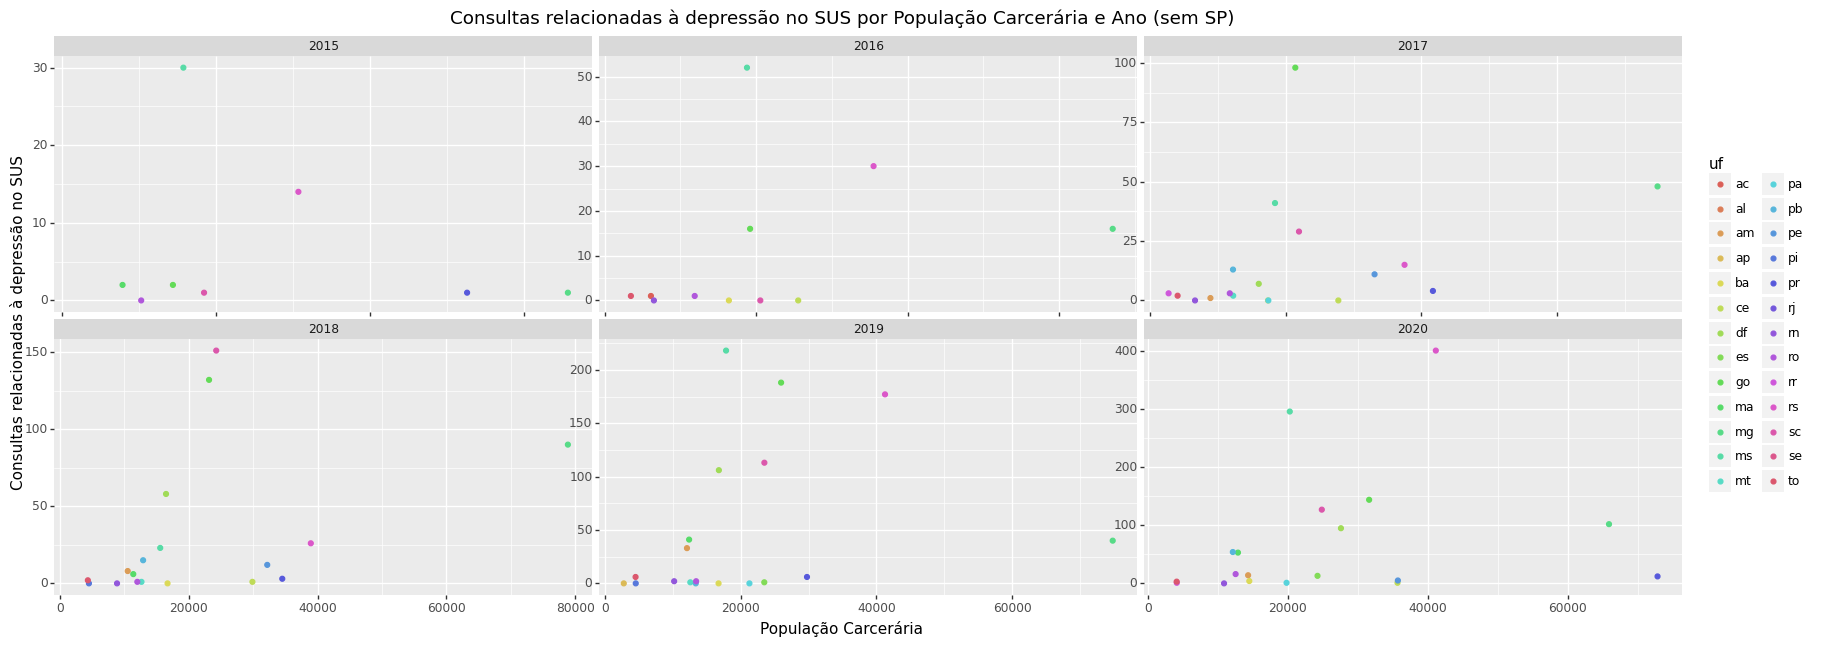

<ggplot: (8778712085741)>

In [124]:
# pop_carc vs Consultas no SUS
inner_merged_total_semsp = inner_merged_total[inner_merged_total["uf"] != "sp"]
(
ggplot(data = inner_merged_total_semsp,
       mapping = aes(x = 'pop_carc', y = 'cons_sus', colour = 'uf')) 
+ geom_point() 
+ facet_wrap('~ ano', scales = "free")
+ theme(figure_size = (21, 7))
+ labs(title = "Consultas relacionadas à depressão no SUS por População Carcerária e Ano (sem SP)", 
       x = "População Carcerária", 
       y = "Consultas relacionadas à depressão no SUS")
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 64 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


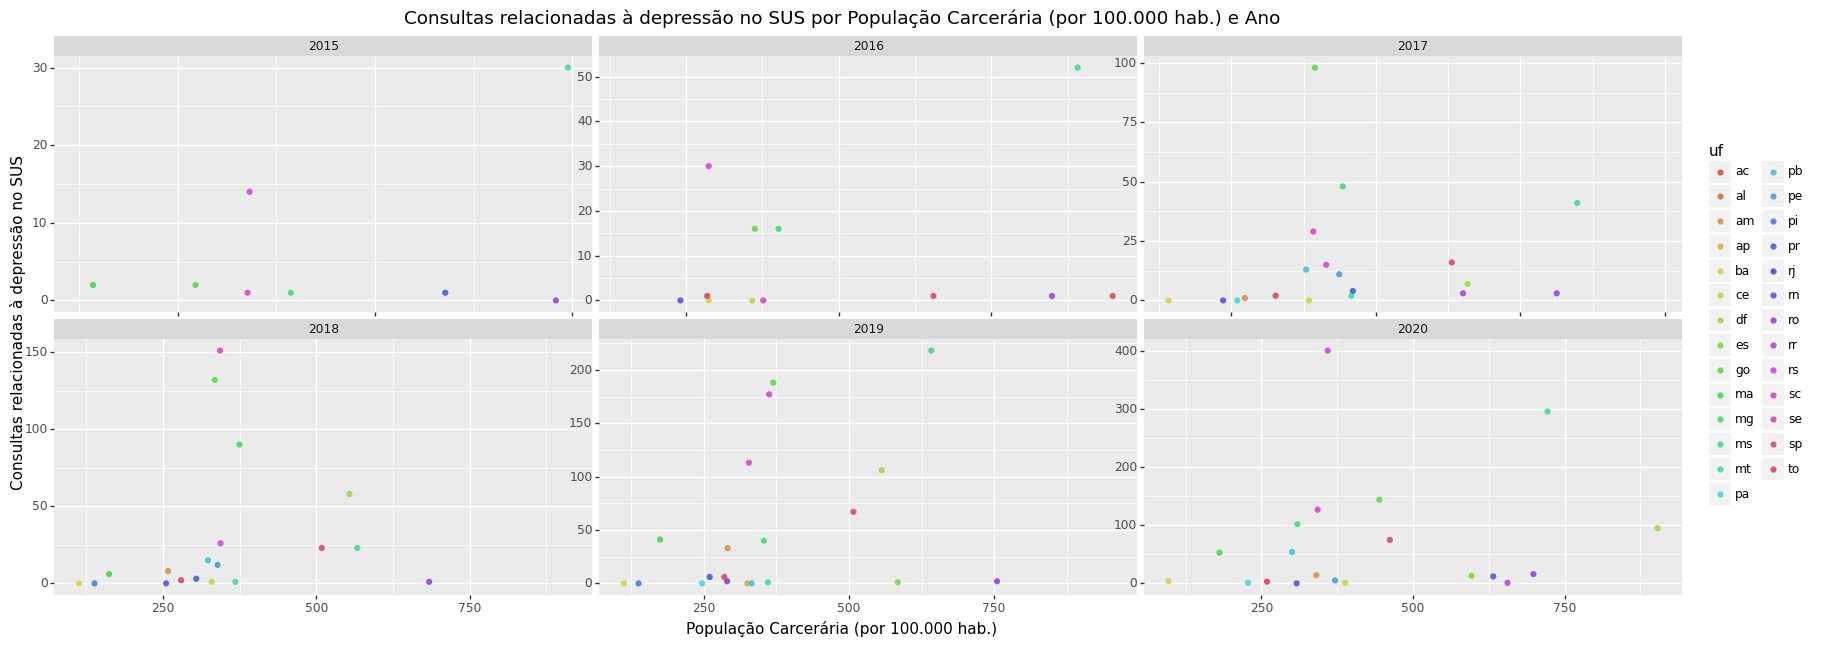

<ggplot: (8778712453597)>

In [123]:

# pop_carc proporcional à população vs Consultas no SUS

(
ggplot(data = inner_merged_total,
       mapping = aes(x = 'tx_100k_hab', y = 'cons_sus', colour = 'uf')) 
+ geom_point() 
+ facet_wrap('~ ano', scales = "free")
+ theme(figure_size = (21, 7))
+ labs(title = "Consultas relacionadas à depressão no SUS por População Carcerária (por 100.000 hab.) e Ano", 
       x = "População Carcerária (por 100.000 hab.)", 
       y = "Consultas relacionadas à depressão no SUS")
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 64 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


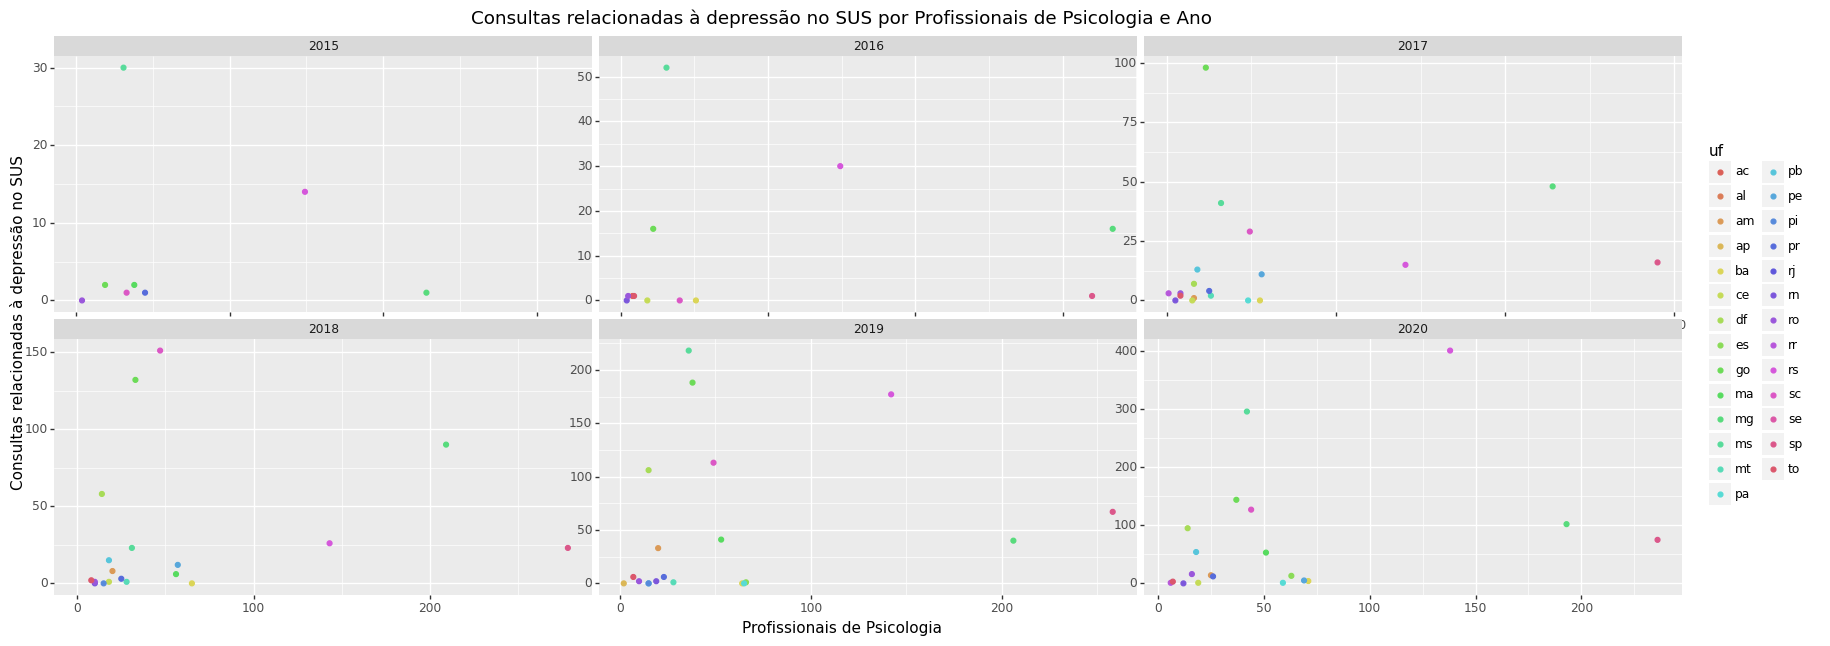

<ggplot: (8778712274429)>

In [125]:
# Psicólogos vs Consultas no SUS

(
ggplot(data = inner_merged_total,
       mapping = aes(x = 'psico', y = 'cons_sus', colour = 'uf')) 
+ geom_point() 
+ facet_wrap('~ ano', scales = "free")
+ theme(figure_size = (21, 7))
+ labs(title = "Consultas relacionadas à depressão no SUS por Profissionais de Psicologia e Ano", 
       x = "Profissionais de Psicologia", 
       y = "Consultas relacionadas à depressão no SUS")
)